In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the transformation to apply to the images
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training and test datasets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

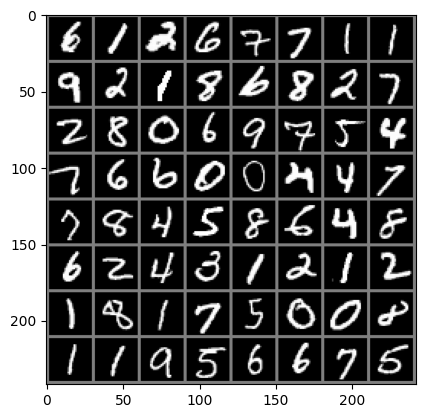

    6     1     2     6     7     7     1     1     9     2     1     8


In [3]:
import numpy as np
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(' '.join('%5s' % labels[j].item() for j in range(12)))

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x


In [12]:
net = Net()

In [13]:
criterion = nn.CrossEntropyLoss()

In [14]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [20]:
num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        x, labels = data
        optimizer.zero_grad()
        outputs = net(x)
        loss = criterion(outputs, labels )
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')
        


[Epoch 1, Batch 100] loss: 1.388
[Epoch 1, Batch 200] loss: 0.495
[Epoch 1, Batch 300] loss: 0.391
[Epoch 1, Batch 400] loss: 0.337
[Epoch 1, Batch 500] loss: 0.333
[Epoch 1, Batch 600] loss: 0.285
[Epoch 1, Batch 700] loss: 0.261
[Epoch 1, Batch 800] loss: 0.251
[Epoch 1, Batch 900] loss: 0.233
[Epoch 2, Batch 100] loss: 0.215
[Epoch 2, Batch 200] loss: 0.197
[Epoch 2, Batch 300] loss: 0.197
[Epoch 2, Batch 400] loss: 0.177
[Epoch 2, Batch 500] loss: 0.174
[Epoch 2, Batch 600] loss: 0.177
[Epoch 2, Batch 700] loss: 0.164
[Epoch 2, Batch 800] loss: 0.162
[Epoch 2, Batch 900] loss: 0.170
[Epoch 3, Batch 100] loss: 0.154
[Epoch 3, Batch 200] loss: 0.130
[Epoch 3, Batch 300] loss: 0.138
[Epoch 3, Batch 400] loss: 0.132
[Epoch 3, Batch 500] loss: 0.130
[Epoch 3, Batch 600] loss: 0.125
[Epoch 3, Batch 700] loss: 0.127
[Epoch 3, Batch 800] loss: 0.122
[Epoch 3, Batch 900] loss: 0.125
[Epoch 4, Batch 100] loss: 0.139
[Epoch 4, Batch 200] loss: 0.108
[Epoch 4, Batch 300] loss: 0.118
[Epoch 4, 

In [21]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the network on the 10000 test images: 96.70%


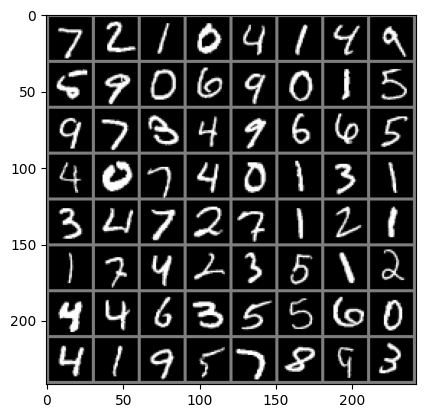

GroundTruth:      7     2     1     0     4     1     4     9
Predicted:      7     2     1     0     4     1     4     9


In [22]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# Print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j].item() for j in range(8)))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % predicted[j].item() for j in range(8)))

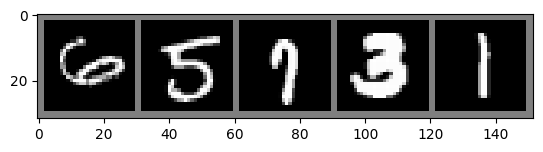

GroundTruth:      6     5     7     3     1


In [36]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the transformation to apply to the images
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the test dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=5, shuffle=True)

# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print('GroundTruth: ', ' '.join('%5s' % labels[j].item() for j in range(5)))

In [37]:
# Use the model to predict the labels
with torch.no_grad():
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % predicted[j].item() for j in range(5)))

Predicted:      6     5     9     3     1


In [18]:
# Save the model
model_path = 'C:/Users/kumar/OneDrive/Desktop/NNTutorial/mnist_model1.pth'
torch.save(net, model_path)
print(f'Model saved to {model_path}')

Model saved to C:/Users/kumar/OneDrive/Desktop/NNTutorial/mnist_model1.pth


In [19]:
# Load the entire model
model_path = 'C:/Users/kumar/OneDrive/Desktop/NNTutorial/mnist_model1.pth'
model = torch.load(model_path)
model.eval()
print('Entire model loaded and ready for inference')

Entire model loaded and ready for inference
